# Financial Econometrics II: Project 1
### Jakub Laza and David Cerny

### Packages set-up

In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/FinEcox2/Financial-Ecox-Project1`


In [2]:
Pkg.instantiate()

In [3]:
Pkg.add("MarketData")

   Resolving package versions...
  No Changes to `~/Desktop/FinEcox2/Financial-Ecox-Project1/Project.toml`
  No Changes to `~/Desktop/FinEcox2/Financial-Ecox-Project1/Manifest.toml`


In [25]:
Pkg.add("Distributions")

   Resolving package versions...
    Updating `~/Desktop/FinEcox2/Financial-Ecox-Project1/Project.toml`
  [31c24e10] + Distributions v0.25.112
  No Changes to `~/Desktop/FinEcox2/Financial-Ecox-Project1/Manifest.toml`


In [4]:
using MarketData

In [26]:
using Distributions

### Get data from Yahoo Finance (We are working with AutoZone, Inc.)

In [5]:
data = MarketData.yahoo(:AZO)

8458×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 1991-04-02 to 2024-10-28
┌────────────┬─────────┬─────────┬─────────┬─────────┬──────────┬──────────┐
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume   │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│ 1991-04-02 │   6.875 │   7.375 │  6.5625 │ 7.34375 │  7.34375 │ 9.1472e6 │
│ 1991-04-03 │ 7.28125 │ 7.34375 │   6.875 │  7.3125 │   7.3125 │ 3.4032e6 │
│ 1991-04-04 │ 7.28125 │ 7.28125 │ 7.09375 │ 7.21875 │  7.21875 │ 831200.0 │
│ 1991-04-05 │   7.125 │  7.1875 │ 7.09375 │   7.125 │    7.125 │ 457200.0 │
│ 1991-04-08 │  7.0625 │  7.1875 │   6.875 │   7.125 │    7.125 │ 608800.0 │
│ 1991-04-09 │   7.125 │    7.25 │   7.125 │  7.1875 │   7.1875 │ 472400.0 │
│ 1991-04-10 │   7.125 │     7.5 │   7.125 │     7.5 │      7.5 │ 781600.0 │
│ 1991-04-11 │    7.75 │ 8.28125 │    7.75 │  8.0625 │   8.0625 │ 1.3392e6 │
│ 1991-04-12 │   8.125 │    8.25 │  8.0625 │ 8.15625 │  8.15625 │ 468800.0 │

### Data Exploration

In [6]:
Pkg.add(["Plots", "Statistics", "DataFrames", "StatsPlots"])

   Resolving package versions...
   Installed libdecor_jll ────────────── v0.2.2+0
   Installed JpegTurbo_jll ───────────── v3.0.4+0
   Installed Libmount_jll ────────────── v2.40.1+0
   Installed libfdk_aac_jll ──────────── v2.0.3+0
   Installed LERC_jll ────────────────── v4.0.0+0
   Installed GR_jll ──────────────────── v0.73.8+0
   Installed HypergeometricFunctions ─── v0.3.24
   Installed OffsetArrays ────────────── v1.14.1
   Installed Opus_jll ────────────────── v1.3.3+0
   Installed RelocatableFolders ──────── v1.0.1
   Installed Xorg_xkbcomp_jll ────────── v1.4.6+0
   Installed StatsFuns ───────────────── v1.3.2
   Installed FFTW ────────────────────── v1.8.0
   Installed Unitful ─────────────────── v1.21.0
   Installed Measures ────────────────── v0.3.2
   Installed PDMats ──────────────────── v0.11.31
   Installed PlotUtils ───────────────── v1.4.2
   Installed StaticArrays ────────────── v1.9.8
   Installed Contour ─────────────────── v0.6.3
   Installed NearestNeighbors ──

In [7]:
using DataFrames, Statistics, Plots, StatsPlots

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


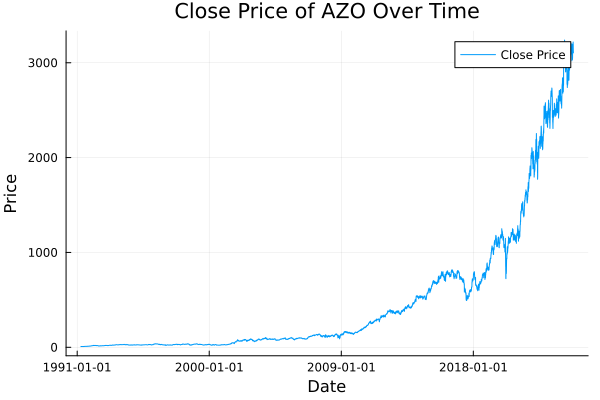

In [12]:
df = DataFrame(data) 
# Convert the index to a Date type if it's not already
df.date = Dates.Date.(df.timestamp)

# Plotting the Close prices over time
plot(df.date, df.Close, label="Close Price", xlabel="Date", ylabel="Price", title="Close Price of AZO Over Time", legend=:topright)

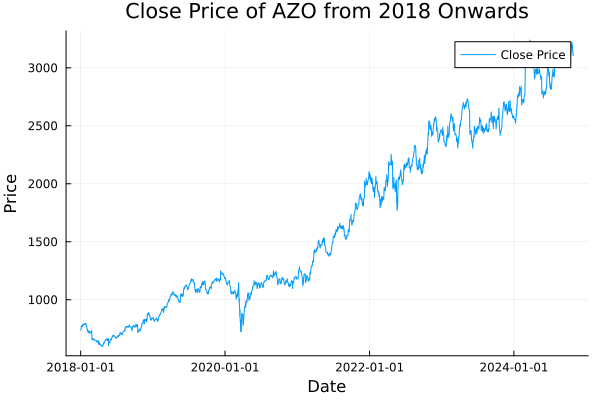

In [14]:
# Filter the DataFrame for dates from 2018 onwards
filtered_df = df[df.date .>= Date("2018-01-01"), :]

# Plotting Close prices from 2018 onwards
plot(filtered_df.date, filtered_df.Close, 
     label="Close Price", 
     xlabel="Date", 
     ylabel="Price", 
     title="Close Price of AZO from 2018 Onwards", 
     legend=:topright)

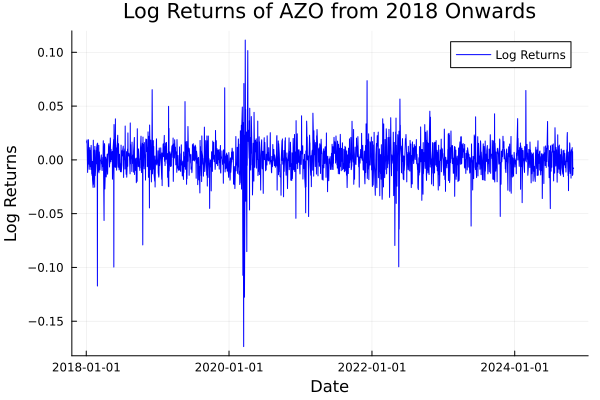

In [49]:
plot(filtered_df.date, filtered_df.LogReturns, 
     label="Log Returns", 
     xlabel="Date", 
     ylabel="Log Returns", 
     title="Log Returns of AZO from 2018 Onwards", 
     legend=:topright, 
     color=:blue)

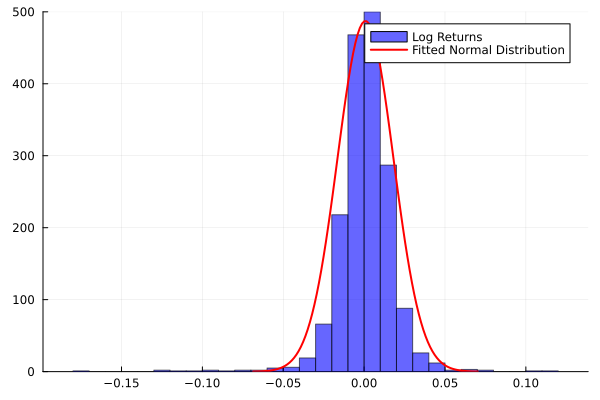

In [40]:
# Remove NaN values for histogram
log_returns = filtered_df.LogReturns[.!isnan.(filtered_df.LogReturns)]

# Calculate mean and standard deviation
mean_return = mean(log_returns)
std_return = std(log_returns)

# Create histogram of log returns
histogram(log_returns, bins=30, label="Log Returns", alpha=0.6, color=:blue, legend=:topright)

normal_dist = Normal(mean_return, std_return)

# Overlay the fitted normal distribution
x = range(mean_return - 4*std_return, stop=mean_return + 4*std_return, length=100)
y = 1.3*pdf(normal_dist, x)  # Calculate PDF of the fitted normal distribution

# Scale the normal distribution to match histogram
bin_width = (maximum(log_returns) - minimum(log_returns)) / 30  # Assuming 30 bins
y_scaled = y * (length(log_returns) * bin_width) 

# Plot normal distribution
plot!(x, y_scaled, label="Fitted Normal Distribution", color=:red, linewidth=2)

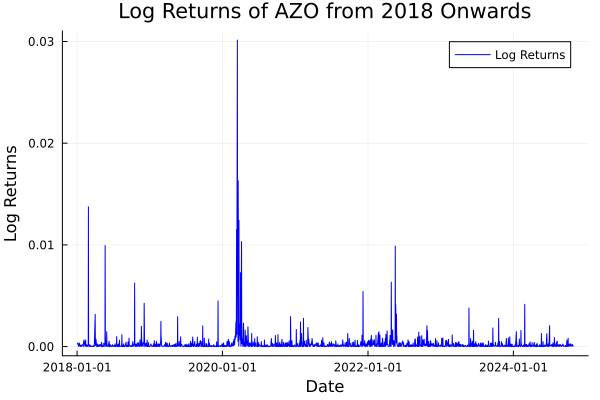

In [50]:
plot(filtered_df.date, filtered_df.LogReturns.^2, 
     label="Log Returns", 
     xlabel="Date", 
     ylabel="Log Returns", 
     title="Log Returns of AZO from 2018 Onwards", 
     legend=:topright, 
     color=:blue)

In [13]:
# Summary statistics for Close prices
mean_close = mean(df.Close)
std_close = std(df.Close)
min_close = minimum(df.Close)
max_close = maximum(df.Close)

println("Summary Statistics for Close Prices:")
println("Mean: $mean_close")
println("Standard Deviation: $std_close")
println("Min: $min_close")
println("Max: $max_close")

Summary Statistics for Close Prices:
Mean: 493.30869190516444
Standard Deviation: 727.9069850510962
Min: 7.125
Max: 3239.320068359375


In [15]:
# Get a summary of the DataFrame
summary_stats = describe(df)
println(summary_stats)

8×7 DataFrame
 Row │ variable   mean       min         median    max         nmissing  eltype   
     │ Symbol     Union…     Any         Union…    Any         Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────────
   1 │ timestamp             1991-04-02            2024-10-28         0  Date
   2 │ Open       493.119    6.875       123.7     3237.43            0  Float64
   3 │ High       498.102    7.1875      125.085   3256.37            0  Float64
   4 │ Low        488.059    6.5625      121.68    3193.76            0  Float64
   5 │ Close      493.309    7.125       123.58    3239.32            0  Float64
   6 │ AdjClose   493.309    7.125       123.58    3239.32            0  Float64
   7 │ Volume     5.30088e5  17800.0     365150.0  1.36667e7          0  Float64
   8 │ date                  1991-04-02            2024-10-28         0  Date


### ARCH modeling

In [52]:
Pkg.add("ARCHModels")

   Resolving package versions...
   Installed Accessors ────────────── v0.1.38
   Installed NLSolversBase ────────── v7.8.3
   Installed StatsModels ──────────── v0.7.4
   Installed GLM ──────────────────── v1.9.0
   Installed MuladdMacro ──────────── v0.2.4
   Installed HypothesisTests ──────── v0.11.3
   Installed FiniteDiff ───────────── v2.26.0
   Installed Roots ────────────────── v2.2.1
   Installed Combinatorics ────────── v1.0.2
   Installed DiffResults ──────────── v1.1.0
   Installed DiffRules ────────────── v1.15.1
   Installed ConstructionBase ─────── v1.5.8
   Installed Setfield ─────────────── v1.1.1
   Installed PositiveFactorizations ─ v0.2.4
   Installed CommonSubexpressions ─── v0.3.1
   Installed ARCHModels ───────────── v2.4.0
   Installed CompositionsBase ─────── v0.1.2
   Installed InverseFunctions ─────── v0.1.17
   Installed ArrayInterface ───────── v7.16.0
   Installed ForwardDiff ──────────── v0.10.36
   Installed CommonSolve ──────────── v0.2.4
   Installed L

In [77]:
using ARCHModels

In [95]:
model = ARCHModels.fit(GARCH{1,1}, log_returns) 


GARCH{1, 1} model with Gaussian errors, T=1716.

Mean equation parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
μ  0.000718381  0.000389284  1.84539    0.0650
──────────────────────────────────────────────

Volatility parameters:
─────────────────────────────────────────────
      Estimate   Std.Error  z value  Pr(>|z|)
─────────────────────────────────────────────
ω   2.89849e-5  1.50432e-5  1.92678    0.0540
β₁  0.803543    0.0830809   9.67182    <1e-21
α₁  0.0848417   0.0334154   2.539      0.0111
─────────────────────────────────────────────


In [213]:
T = length(log_returns)
preds_vec = Float64[]
windowsize = 200
forecast_dates = filtered_df.date[windowsize+1:T-1]
for t = windowsize+1:T-1
    m = fit(GARCH{1, 1}, log_returns[t-windowsize:t])
    var = predict(m, :variance, 1)
    push!(preds_vec, var[1])
end

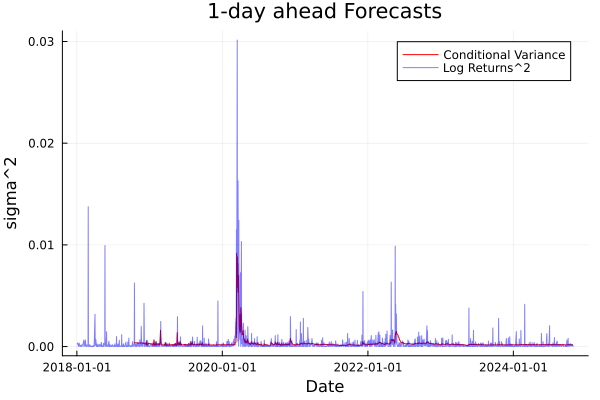

In [214]:
plot(forecast_dates, preds_vec, label="Conditional Variance", color=:red, ylabel="sigma^2", xlabel="Date", title="1-day ahead Forecasts")
plot!(filtered_df.date[2:end], log_returns.^2, label="Log Returns^2", color=:blue, alpha=0.5)

In [ ]:
# Define the rolling window size for 5 days
window_size = 5

# Pre-allocate an array for 5-day volatility
five_day_volatility = Float64[]
lr2 = log_returns.^2
# Compute rolling volatility (standard deviation of squared log returns)
for t in window_size+1:length(lr2)-1
    push!(five_day_volatility, sqrt(mean(lr2[t-window_size:t])))
end

# Add the 5-day volatility to the DataFrame

1710-element Vector{Float64}:
 0.013400500594897778
 0.011746946480739628
 0.012472830242537722
 0.010547869684792006
 0.010092835650205249
 0.009955467206404956
 0.010862799226112932
 0.010786112572311614
 0.007702923760658861
 0.007710789836821929
 0.007704059050758433
 0.00930791864907983
 0.00963289310124206
 ⋮
 0.01153745298909562
 0.01172855550389348
 0.011259861626830295
 0.012947935444569658
 0.0118370761457938
 0.01102840844988354
 0.010227471871303405
 0.010813166246306363
 0.011957397132593209
 0.010240964681526705
 0.011035551005995691
 0.010753135620306909

In [216]:
T = length(log_returns)
preds_vec = Float64[]
windowsize = 200
forecast_dates = filtered_df.date[windowsize+1:T-1]
for t = windowsize+1:T-1
    m = fit(GARCH{1, 1}, log_returns[t-windowsize:t])
    var = sqrt(predict(m, :variance, 1))
    push!(preds_vec, var[1])
end

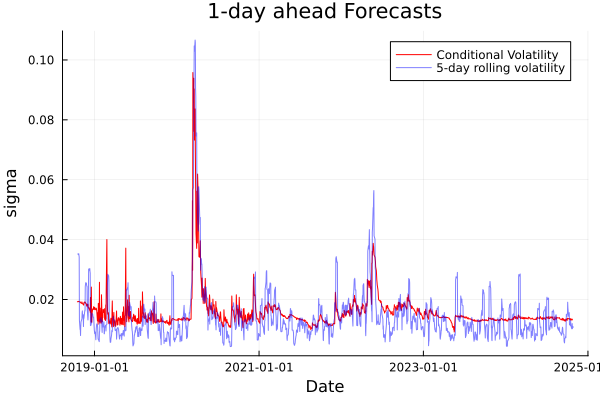

In [217]:
plot(forecast_dates, preds_vec, label="Conditional Volatility", color=:red, ylabel="sigma", xlabel="Date", title="1-day ahead Forecasts")
plot!(filtered_df.date[203:end], five_day_volatility[196:end], label="5-day rolling volatility", color=:blue, alpha=0.5)